<a href="https://colab.research.google.com/github/braing8mes/TCS-TRAIN-23/blob/main/wine_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Project: Analysis of the UCI ML Wine Data Set




---







**Project Name:** Analysis of the UCI ML Wine Dataset

**Project Description:** This dataset contains the results of a chemical analysis of wines grown in the same region in Italy but, derived from three different cultivars. The dataset lists measurements of 13 constituents found in each of the wines. Using k-Means Clustering, develop and evaluate a ML model to answer the question: "Given the data, group the wine samples such that each group originates from each of the cultivars." 

This project provides challenges in data visualization using Python packages and evaluating real-world unsupervised machine learning models.

**Model used:** UCI Wine Dataset

# Overview

---



For this project, a dataframe is provided to you consisting of various chemical analyses of wines grown in the same region in Italy and from three different cultivars. Below are a list of constituents for which data was collected—amongst others—for your reference:

* ```alcohol```: the alcohol content of a wine sample
* ```malic acid```: the malic acid content of a wine sample
* ```hue```: the hue index of a sample of wine
* ```od280/od315_of_diluted_wines```: a method of quantitatively assessing the protein content of a sample of wine



**Key Questions:**
1. Using k-Means Clustering: 
  * Group the wine samples by similar malic acid and alcohol contents.
  * What is the optimal k-Means parameter? How many groups are there?
2. Using k-Means Clustering: 
  * Group the wine samples by similar proline and OD280 contents.
  * What is the optimal k-Means parameter? How many groups are there?

**By the end of this project, you will have:**
1. Visualized the data using pairplots to determine potential variables for clustering.
2. Implemented and evaluated a k-Means Clustering model to group the wine samples by similar malic acid and alcohol contents.
3. Implemented and evaluated a k-Means Clustering model to group the wine samples by similar proline and OD280 contents.

# Project Tasks
---

Welcome to **Analysis of the UCI ML Wine Dataset**. For each step below, make sure all of your code executes correctly and as intended before moving on.

This project is broken down into three parts: 1, 2, and 3. Part 1 is a guided section. Part 2 is an independent section where you will be asked to apply what you learned in Part I on you own. Part 3 is a brief conclusion.

Good luck!

## **Part 1: Pairplotting and k-Means with Malic Acid and Alcohol Contents**

### **Step #1:** Pairplotting

The first part of the application of k-means clustering to any dataset most often involves the generation of a pairplot. Below is an example for the iris dataset:

**Before we break it down, can you decipher what the visualization is trying to show you?**

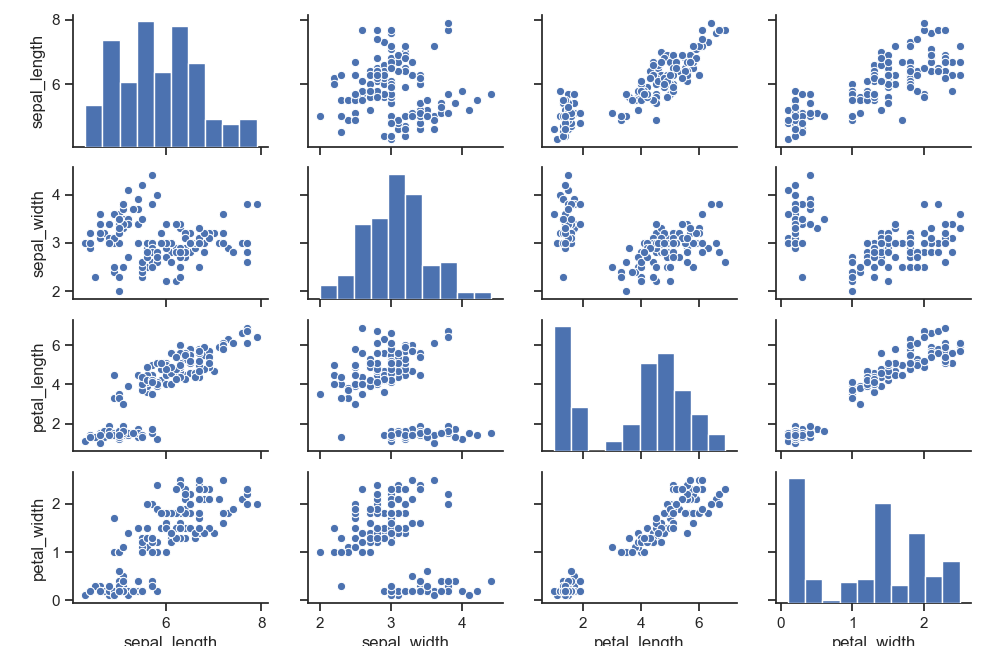

---
A pairplot can be thought of like a matrix (grid) that visualizes the relationships between the different variables of a dataset. For example, take a look the pairplot above:

This plot is derived from the iris dataset that contains information on the ```petal_width```, ```petal_length```, and more of different flowers sampled over time. These correspond to the row and column names of the plot.

---
Now that we understand what each subplot of the pairplot is showing us, **what about the bar graphs?** Why are they there?

The bar graph's of a pairplot are the **dataset's univariate distribution histograms.**

**What's a univariate distribution histogram?** 

It's a lot of data science jargon but it's essentially just the distribution of a variable. For example, look at the histogram of ```sepal_width```. The x-axis of this subplot is the range of different sepal widths that were measured and the y-axis is the **frequency** of each measurment in the dataset.

---

Great! So now that we have an understanding of what a pairplot is, let's generate one for our wine dataset!

#### **Task 1.1:** Pairplot the dataset.

Follow and fill-in the code cells below to generate a pairplot and visualize the dataset.

First, let's import the packages we need.

In [1]:
###############################
import sklearn.datasets as datasets
import pandas as pd
import numpy as np
###############################

Ok, let's load the dataset. Run the following cell to view the first five rows.

In [2]:
###############################
wine = datasets.load_wine()
wine_data = pd.DataFrame(data=np.c_[wine['data'],wine['target']],columns=wine['feature_names']+['target'])
wine_data.head()
###############################

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


Now, before we can start a pairplot, we need to scan for any null values in our dataframe. Run the following cell to print the info() of the dataframe to check for null values.

In [3]:
###############################
wine_data.info()
###############################

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

Looks like we're all good to go. No null values are present. 

We can now generate a pairplot for the ```wine_data``` using seaborn. Run the following cell block to view the data's pairplot. 

**Note: the pairplot may take some time to generate: that's ok!**

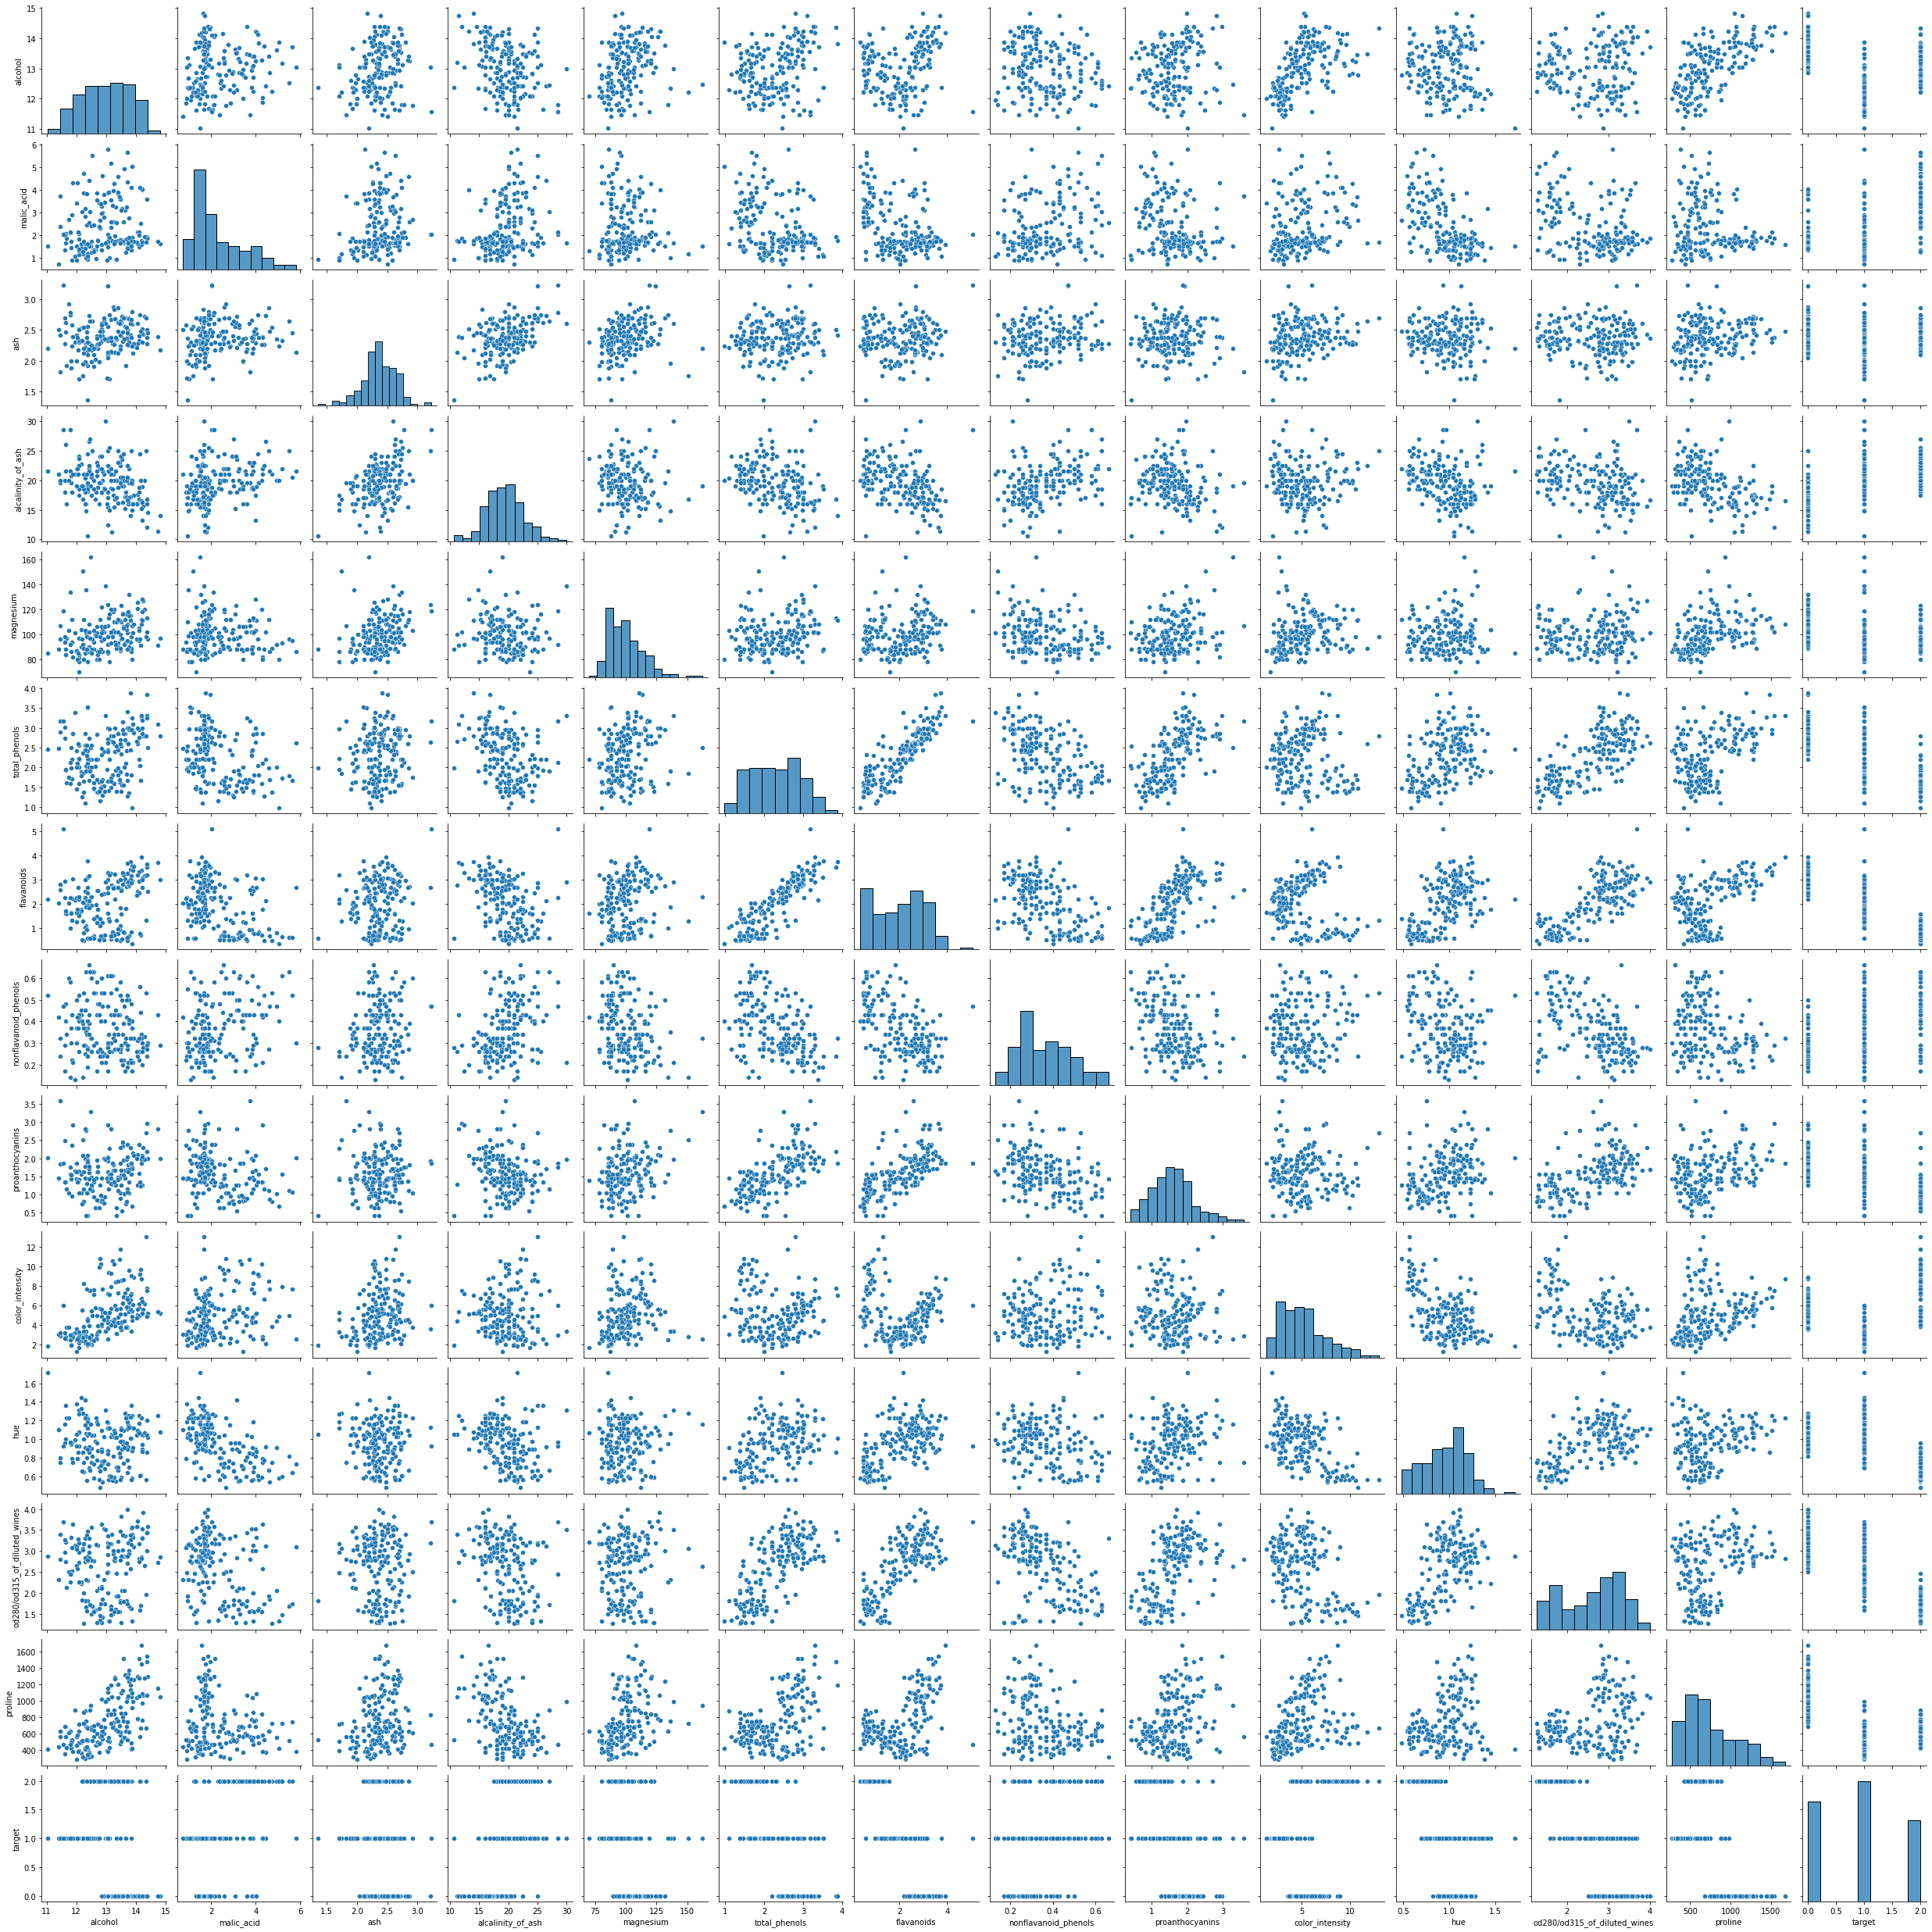

In [5]:
###############################
import seaborn as sns
sns.pairplot(wine_data)
###############################

Now that we have generated a pairplot, let's analyze it!

This pairplot is mean to **show us the relationships between any two variables in the dataset**. Now, just like in most other ML algorithms, we're looking for patterns in the data that are *worth* investigating in more depth. In other words, when using k-means clustering, you want to look for elements on the pairplot matrix that show natural "grouping." 

For example, the graph showing the relationship between malic acid and alcohol exhibits some interesting grouping with data crowding towards the left and spreading out towards the right. **Bingo!**

Next, let's implement and evaluate a k-Means algorithm on malic acid and alcohol.

### **Step #2:** Applying k-Means Clustering to Alcohol and Malic Acid Measurments

#### **Task 2.1:** Determine the optimal k parameter, the number of "means" we will use to group our data with.

Let's focus in on the data we will be using in our clustering model. Create a scatter plot of Alcohol vs. Malic Acid with the given data.

Text(0, 0.5, 'Alcohol')

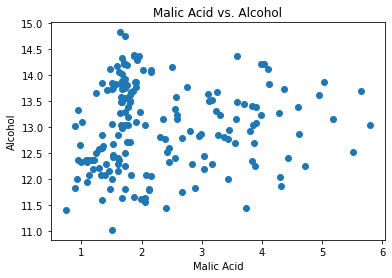

In [6]:
###############################
import matplotlib.pyplot as plt
###############################
plt.scatter(wine_data['malic_acid'], wine_data['alcohol'])
plt.title('Malic Acid vs. Alcohol')
plt.xlabel('Malic Acid')
plt.ylabel('Alcohol')

It might be intuitive to suggest that we use ```k=3``` for our number of means. However, how can we ensure that 3 is the **best**?

**There is a technique for this called, "The Elbow Method."**

#### **Task 2.2:** Apply the Elbow Method

One method of calcuating which value of ```k``` is best is the brute force method: clustering the points with different values of k, so, for k=2, k=3, k=4, and so on until you can see which one is best. 

This principle is corrrect. However, because k-means clustering is an unsupervised learning algorithm, simply generating different clusterings will not tell us anything about the **quality** of the clusterings themselves.

To solve this problem, we have a metric called the WCSS (Within Cluster Sum of Squares). The WCSS essentially describes how much variance we have inside a single cluster. The WCSS is calculated within clusters first by summing the squared distances of each point to the converged mean. Then, these values are summed again. 

For reference, the smaller a WCSS value, the greater proportion of your data is explainable by your model. **The lower the WCSS, the better!**


A formula is presented below:



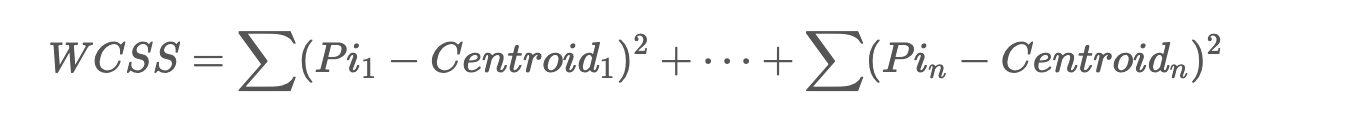

However, scikit-learn has tools to help us quickly calculate the WCSS of many k-means implementations to determine the best value of ```k```. Follow the code cell below to see how the WCSSs of many k-means models are calculated. This will be relevant later.

**Note:** For simplicity, the number of k parameters checked is restricted to 10. However, this range can be extended or shortened as needed!

---

**Code Walkthrough**

First, sklearn.KMeans needs a two dimensional array for its fit() function. So, we need to, in parallel, iterate through the malic acid and alcohol data and group them according to sample. 

**We're creating an (N x 2) array with two columns for malic acid and alcohol data and N rows for each sample.**

In [7]:
###############################
from sklearn.cluster import KMeans

# create a list to hold malic acid and alcohol data by sample
points = [] 

# get the malic acid and alcohol data
malic_acid = wine_data['malic_acid'].values
alcohol = wine_data['alcohol'].values

# append to points malic acid and alcohol data by sample
for mal, alc in zip(malic_acid, alcohol):
  points.append([mal,alc])
###############################

Next, we need to calculate the WCSSs of k-means models with ```number_of_clusters in range(1,11)```. 

**For uniformity, use ```random_state = 42``` for all of your KMeans models.**

In [8]:
###############################
wcss = [] 
for number_of_clusters in range(1, 11): 
    kmeans = KMeans(n_clusters = number_of_clusters, random_state = 42)
    kmeans.fit(points) 
    wcss.append(kmeans.inertia_)
wcss
###############################

[337.5527584269663,
 168.08374191698118,
 95.55394205616608,
 72.68914691708524,
 61.38881612909657,
 51.78785605389445,
 43.24916513123894,
 36.7146541960142,
 32.327158690476196,
 28.823282396507455]

#### **Task 2.3** Graph the WCSS values against their respective k-parameters.

Using matplotlib, plot the WCSS values generated in task 2.2 against their respective k-parameters. The resulting graph should be a decaying exponential line.

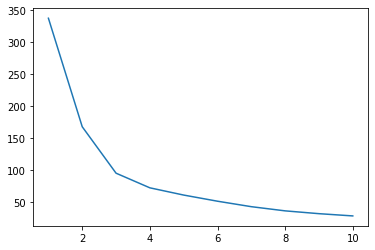

In [ ]:
###############################
plt.plot(range(1,len(wcss) + 1),wcss)
###############################

You may have noticed that your line looks like a bent arm with the elbow sitting right at around 3. This is your optimized k-parameter!

**But why?**

At ```k = 3```, we know that we have optimized the value of k because adding one to k does not result in a significant change in the accuracy of our model (the WCSS no longer decreases very much). Thus, ```k=3``` is able to balance the complexity and accuracy of your model—this prevents over and under fitting!

#### **Task 2.4:** Applying your optimized k-parameter

Now that we have determined our optimized k-parameter, let's apply our model. Follow the code below for an example.

**For uniformity, use ```random_state = 42``` for all of your KMeans models.**

In [9]:
###############################
# create a list to hold malic acid and alcohol data by sample
points = []

# get the malic acid and alcohol data
malic_acid = wine_data['malic_acid'].values
alcohol = wine_data['alcohol'].values

# append to points malic acid and alcohol data by sample
for mal, alc in zip(malic_acid, alcohol):
  points.append([mal,alc])

# implement your optimized kMeans model with k = 3!
kmeans = KMeans(n_clusters = 3, random_state = 42)
kmeans.fit(points)
###############################

KMeans(n_clusters=3, random_state=42)

#### **Task 2.5:** Visualizing your k-Means Clustering

Using matplotlib and ```kmeans.labels_ ```, shade your original scatterplot from task 2.1 according to your clustering labels.

Text(0, 0.5, 'Alcohol')

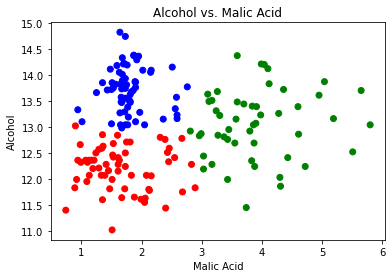

In [10]:
###############################
lbls = kmeans.labels_
colormap = np.array(['red','green','blue'])

plt.scatter(wine_data['malic_acid'], wine_data['alcohol'], c=colormap[lbls])
plt.title('Alcohol vs. Malic Acid')
plt.xlabel('Malic Acid')
plt.ylabel('Alcohol')
###############################

#### **Task 2.6:** Implementing your k-Means Clustering

As in the case of KNN classification and linear regression, we can use our k-mean model's groupings to predict the cultivar of origin of another wine sample. Using the code cell below: let's answer some questions!

1. **If a sample of wine has an alcohol content of 14.2 and a malic acid content of 3.0, what cultivar does this wine likely belong to?**
2. **If a sample of wine has an alcohol content of 2.7 and a malic acid content of 3.5, what cultivar does this wine likely belong to?**

In [11]:
###############################
predict_data = [
         [3.0,14.2],
         [3.5,12.7]
        ]

kmeans = KMeans(n_clusters = 3, random_state = 42)
kmeans.fit(points)
counter = 0

for elem in kmeans.predict(predict_data):
  counter += 1
  print(f'Test Point #{counter}: Cultivar {elem}')
###############################

Test Point #1: Cultivar 2
Test Point #2: Cultivar 1


## **Part 2: k-Means with Proline and OD280 Contents**

Now that we have walked through implementing an optimized k-Means Clustering model to Malic Acid and Alcohol contents, it's your turn!

Follow the steps below to apply k-Means to Proline and OD280 Contents

### **Step #1:** Applying k-Means Clustering to Proline and OD280 Measurments

#### **Task 1.1:** Determine the optimal k parameter, the number of "means" we will use to group our data with.

Let's focus in on the data we will be using in our clustering model. Create a scatter plot of Proline vs. OD280 with the given data.

**Note:** OD280 measurments are stored with column name ```od280/od315_of_diluted_wines```

Text(0, 0.5, 'Proline')

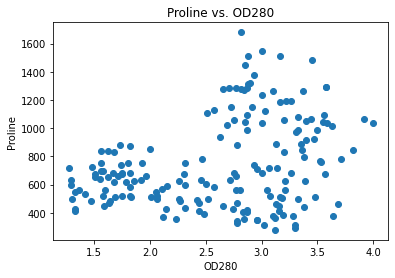

In [12]:
# Implement your plot here


#### **Task 2.2:** Apply the Elbow Method - Finding WCSS Values

Below is some code that calculates the WCSS values for k-parameters [1,10]. 
For readability, a dictionary with the (key : value) pairing of (k-value : WCSS) is printed. 

**For uniformity, ```random_state = 42``` is used for all KMeans models.**

In [1]:
from sklearn.cluster import KMeans

points = []

od280 = wine_data['od280/od315_of_diluted_wines'].values
proline = wine_data['proline'].values

for od, pro in zip(od280, proline):
  points.append([od,alc])

wcss = [] 
for number_of_clusters in range(1, 11): 
    kmeans = KMeans(n_clusters = number_of_clusters, random_state = 42)
    kmeans.fit(points) 
    wcss.append(kmeans.inertia_)

dic_wcss = {}

for ss,k in zip(wcss,range(1,11)):
  dic_wcss[k] = ss

dic_wcss

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\Brian Liu\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Brian Liu\AppData\Local\Temp\ipykernel_12612\505988642.py", line 5, in <cell line: 5>
    od280 = wine_data['od280/od315_of_diluted_wines'].values
NameError: name 'wine_data' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\Brian Liu\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 1993, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "c:\Users\Brian Liu\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\ultratb.py", line 1118, in structured_traceback
    return FormattedTB.structured_traceback(
  File "c:\Users\Brian Liu\AppData\Local\Programs\Python\Python310

#### **Task 2.3** Apply the Elbow Method - Graphing WCSS Values (Elbow Plot)

Using matplotlib, we have created an Elbow Plot. Determine what the ideal k-parameter is. 

Store the ideal k in the variable ```k_ideal```.

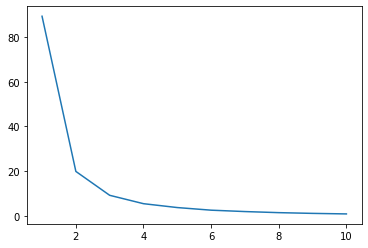

In [14]:
###############################
plt.plot(range(1,len(wcss) + 1),wcss)
###############################

# Store the ideal k-parameter to a variable called k_ideal here.


#### **Task 2.4:** Applying your optimized k-parameter

Now that we have determined our optimized k-parameter, let's apply our model. Create a k-means model for the data.

**For uniformity, use ```random_state = 42``` for all of your KMeans models.**

In [16]:
# Create your k-means model here. Name the model kmeans.


KMeans(n_clusters=3, random_state=42)

#### **Task 2.5:** Visualizing your k-Means Clustering

Create a scatterplot as in task 2.1. However, now you must shade your scatterplot according to the clusters your k-Means model generated.

Text(0, 0.5, 'Proline')

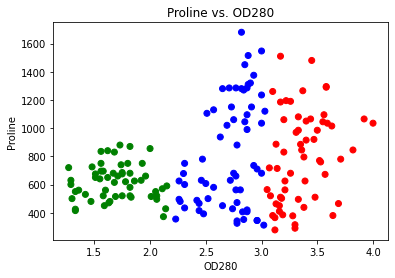

In [17]:
###############################
labels = kmeans.labels_
###############################

# Create a colormap and plot your clusters with it here.


#### **Task 2.6:** CHALLENGE! Implementing your k-Means Clustering

As in the case of KNN classification and linear regression, we can use our k-mean model's groupings to predict the cultivar of origin of another wine sample. Using the code cell below: let's answer some questions!

1. **If a sample of wine has a proline content of 1289 and a OD280 of 2.19, what cultivar does this wine likely belong to?**
2. **If a sample of wine has a proline content of 302 and a OD280 of 3.28, what cultivar does this wine likely belong to?**

In [18]:
# Predict which cultivar the wine belongs to here.


Test Point #1: Cultivar 1
Test Point #2: Cultivar 2


## **Part 3: Conclusion**

Congratulations! You have completed the project. You should now know how to:

1. Visualize data using pairplots to determine potential variables for clustering.
2. Implement and evaluate a k-Means Clustering model to group samples by features.
3. Employ a k-Means model to predict a test point's label.

---

But, what's the **big picture** idea here? Well, let's think. What patterns did your analysis exhibit? 

One thing that might be worth noting is that for each of the k-Means Clustering models that you generated and evaluated, the ideal k-parameter was ```3```. Does this make sense?

---
It should! Most often, the ideal k-parameter for most models lies within the dataset itself. Would it make sense for us to group the wine samples into 6 groups if they originated from three individual cultivars? 

Our clustering algorithm concluded that there are three groups inherent to the dataset. However, isn't it crazy to think that our computer was able to illuminate that without knowing the origin of the data? 

Now, in the real world, scientists more often than not don't know what clusters they're looking for just as you had at the beginning of this project. So, it can be very useful to think about the results that our algorithms return. 

---

You're now equipped with the tools to start exploring the world of k-Means Clustering! **Can you see any other patterns in this dataset?**